/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)
/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


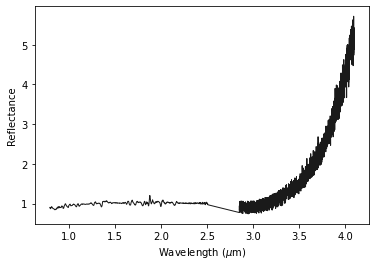

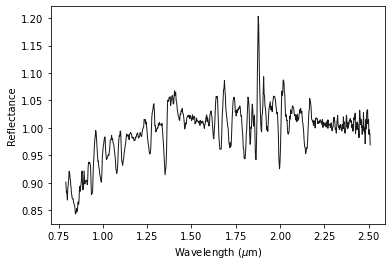

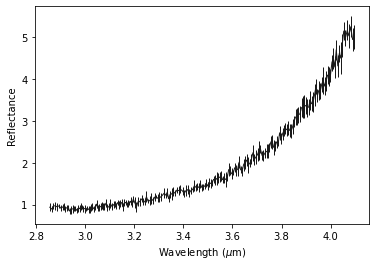

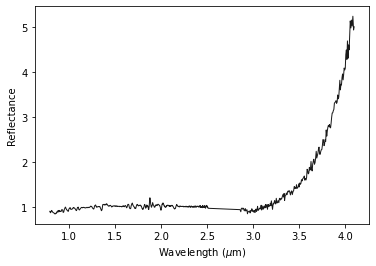

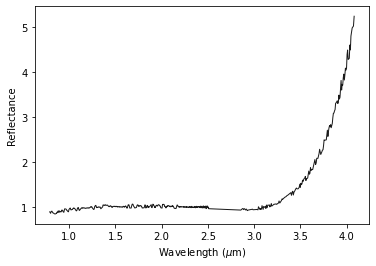

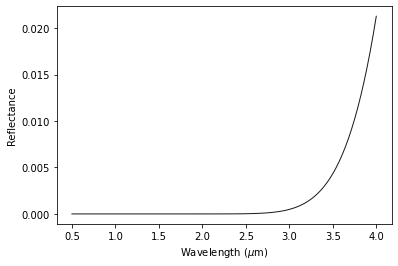

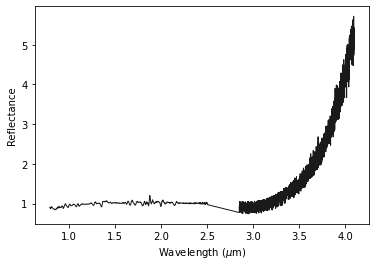

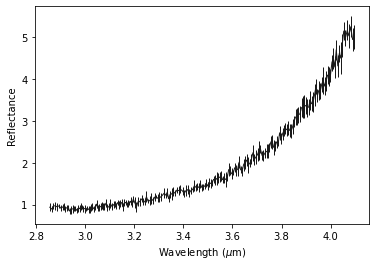

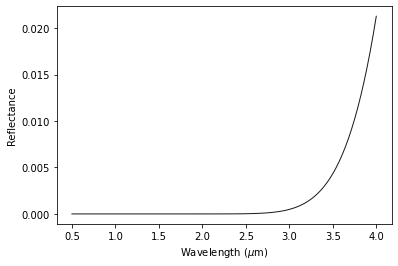

In [1]:
import cana
import numpy as np
import matplotlib.pyplot as plt
from cana.datasets import getspectrum

spec = cana.loadspec('/home/camila/Desktop/TCC/GitHub/README.rst/sulamitis-spec-dados.py')

spec = spec.mask_region(region=[2.55,2.85])

spec = spec.trim(0.68,4.175) 

spec = spec.clean_spec()

aux = np.where(spec.w < 2.55)[0] 
spec_ir1 = spec[aux] 

spec_ir1 = spec.trim(0.79,2.51) 

aux = np.where(spec.w > 2.55)[0] 
spec_ir2 = spec[aux] 

spec_ir2 = spec.trim(2.84,4.1)

specnew = cana.stack_spec([spec_ir1, spec_ir2])
specnew.plot()




aux = np.where(specnew.w < 2.55)[0] 
spec1 = specnew[aux] 
spec1.plot()

aux = np.where(specnew.w > 2.55)[0] 
spec2 = specnew[aux] 

spec2_rebin = spec2.rebin()
spec2_rebin.plot()

specnovo = cana.stack_spec([spec1, spec2_rebin])
specnovo.plot()

specnovo_clean = specnovo.clean_spec()
specnovo_clean.plot()



r = 2.36
delta = 1.38

x = cana.NEATM(r, delta, phase_angle=4.83, eta=0.9, epsilon=0.9, G=0.15)

distancia_do_sol = 2.36
distancia_da_terra = 1.38
albedo = 0.045
diametro = 60.171

m = cana.NEATM(distancia_do_sol, distancia_da_terra)
wave = np.linspace(0.5, 4.0, 100)

thermal_speca = m.flux(albedo, diametro, wavelengths=wave)
thermal_speca.plot()




spec = spec.mask_region(region=[2.55,2.85])

spec = spec.trim(0.68,4.175) 

spec = spec.clean_spec()

aux = np.where(spec.w < 2.55)[0] 
spec_ir1 = spec[aux] 

spec_ir1 = spec.trim(0.79,2.51) 

aux = np.where(spec.w > 2.55)[0] 
spec_ir2 = spec[aux] 

spec_ir2 = spec.trim(2.84,4.1)

specnew = cana.stack_spec([spec_ir1, spec_ir2])
specnew.plot()


spec2_rebin = spec2.rebin()
spec2_rebin.plot()

thermal_speca = m.flux(albedo, diametro, wavelengths=wave)
thermal_speca.plot()

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



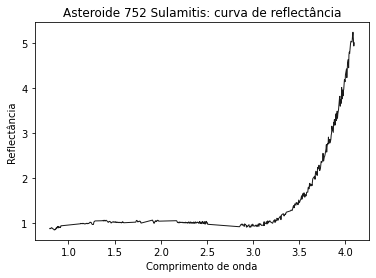

In [2]:
import cana
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from cana.datasets import getspectrum
import plotly.express as px

df = px.data.tips()

sulamitis = cana.loadspec("sulamitis_corr.txt")

sulamitis = spec.mask_region(region=[2.55,2.85])

sulamitis = spec.trim(0.68,4.175) 

sulamitis = sulamitis.clean_spec()

aux = np.where(sulamitis.w < 2.55)[0] 
sulamitis_ir1 = sulamitis[aux] 

sulamitis_ir1 = sulamitis.trim(0.79,2.51) 
sulamitis_ir1 = sulamitis_ir1.mask_region(region=[[0.925,1.130],[1.29,1.37],[1.60,1.73],[1.79,1.91],[1.978,2.17]]) 

aux = np.where(sulamitis.w > 2.55)[0] 
sulamitis_ir2 = sulamitis[aux] 

sulamitis_ir2 = sulamitis.trim(2.84,4.1)

sulamitisnew = cana.stack_spec([sulamitis_ir1, sulamitis_ir2])

aux = np.where(sulamitisnew.w < 2.55)[0] 
sulamitis1 = sulamitisnew[aux] 

aux = np.where(sulamitisnew.w > 2.55)[0] 
sulamitis2 = sulamitisnew[aux] 

sulamitis2_7bin_rebin = sulamitis2.rebin(7)

sulamitisnovo7 = cana.stack_spec([sulamitis1, sulamitis2_7bin_rebin])

sulamitisnovo7_clean = sulamitisnovo7.clean_spec()

sulamitisnovo7_clean.plot()


def func(wave, albedo, eta):
    phi = np.radians(4.83) #angulo de fase
    distancia_do_sol = 2.36
    distancia_da_terra = 1.38
    m = cana.NEATM(distancia_do_sol, distancia_da_terra, phi, eta)
    magnitude_absoluta = 10.34
    diametro = (1329/np.sqrt(albedo))*(10**(-0.2*magnitude_absoluta))
    thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
    return thermal_spec.r


plt.title("Asteroide 752 Sulamitis: curva de reflectância")
plt.xlabel("Comprimento de onda")
plt.ylabel("Reflectância")
alpha = optimize.curve_fit(func, xdata = sulamitisnovo7_clean.w, ydata = sulamitisnovo7_clean.r, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=[[0,0.8],[1,1.2]], method="trf", jac=None)

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



<Figure size 1800x1224 with 0 Axes>

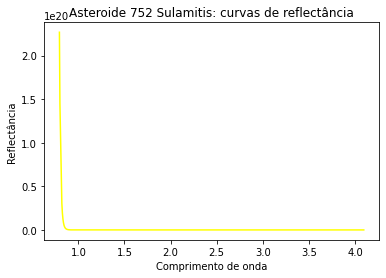

<Figure size 1800x1224 with 0 Axes>

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 752 Sulamitis: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

thermal_speca = func(sulamitisnovo7_clean.w, alpha[0][0], alpha[0][1])
plt.plot(sulamitisnovo7_clean.w, sulamitisnovo7_clean.r/thermal_speca, "yellow", lw=1.5,linestyle="solid")

#plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
#           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)


plt.figure(figsize=(25, 17))

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



<Figure size 1800x1224 with 0 Axes>

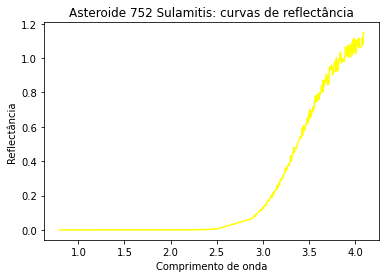

<Figure size 1800x1224 with 0 Axes>

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 752 Sulamitis: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

thermal_speca = func(sulamitisnovo7_clean.w, alpha[0][0], alpha[0][1])
plt.plot(sulamitisnovo7_clean.w, thermal_speca/sulamitisnovo7_clean.r, "yellow", lw=1.5,linestyle="solid")

#plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
#           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)


plt.figure(figsize=(25, 17))

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



<Figure size 1800x1224 with 0 Axes>

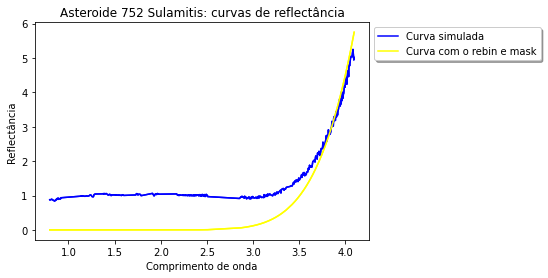

<Figure size 1800x1224 with 0 Axes>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 752 Sulamitis: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

plt.plot(sulamitisnovo7_clean.w, sulamitisnovo7_clean.r,"blue", lw=1.5,linestyle="solid")
thermal_speca = func(sulamitisnovo7_clean.w, alpha[0][0], alpha[0][1])
plt.plot(sulamitisnovo7_clean.w,thermal_speca, "yellow", lw=1.5,linestyle="solid")

plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)

plt.plot(sulamitisnovo7_clean.w, sulamitisnovo7_clean.r,"blue", lw=1.5,linestyle="solid")
plt.plot(sulamitisnovo7_clean.w,thermal_speca, "yellow", lw=1.5,linestyle="solid")


plt.figure(figsize=(25, 17))

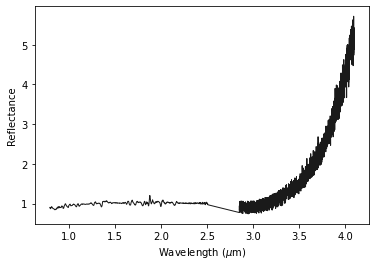

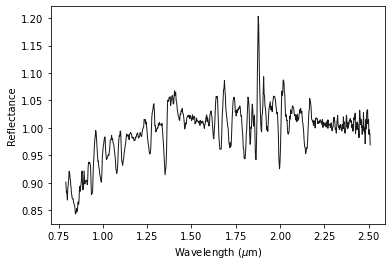

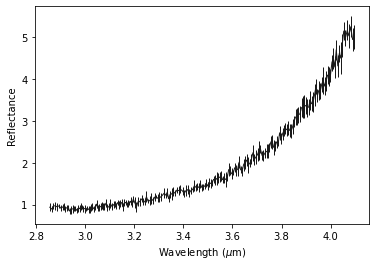

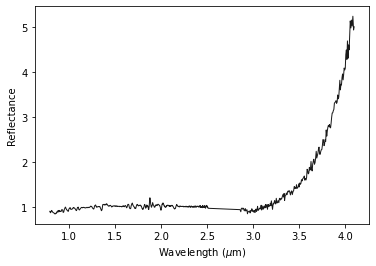

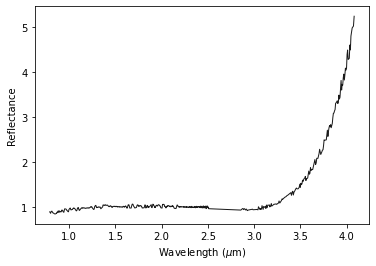

In [6]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import cana
from cana.datasets import getspectrum
import numpy as np

spec = cana.loadspec('/home/camila/Desktop/TCC/GitHub/README.rst/sulamitis-spec-dados.py')

spec = spec.mask_region(region=[2.55,2.85])

spec = spec.trim(0.68,4.175) 

spec = spec.clean_spec()

aux = np.where(spec.w < 2.55)[0] 
spec_ir1 = spec[aux] 

spec_ir1 = spec.trim(0.79,2.51) 

aux = np.where(spec.w > 2.55)[0] 
spec_ir2 = spec[aux] 

spec_ir2 = spec.trim(2.84,4.1)

specnew = cana.stack_spec([spec_ir1, spec_ir2])
specnew.plot()

aux = np.where(specnew.w < 2.55)[0] 
spec1 = specnew[aux] 
spec1.plot()

aux = np.where(specnew.w > 2.55)[0] 
spec2 = specnew[aux] 

spec2_rebin = spec2.rebin()
spec2_rebin.plot()

specnovo = cana.stack_spec([spec1, spec2_rebin])
specnovo.plot()

specnovo_clean = specnovo.clean_spec()
specnovo_clean.plot()

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



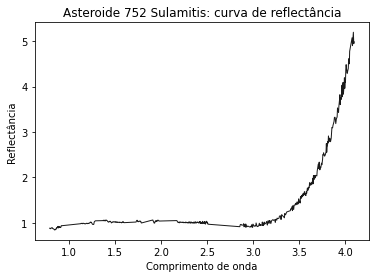

In [7]:
import cana
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from cana.datasets import getspectrum
import plotly.express as px

df = px.data.tips()

sulamitis = cana.loadspec("sulamitis_corr.txt")

sulamitis = spec.mask_region(region=[2.55,2.85])

sulamitis = spec.trim(0.68,4.175) 

sulamitis = sulamitis.clean_spec()

aux = np.where(sulamitis.w < 2.55)[0] 
sulamitis_ir1 = sulamitis[aux] 

sulamitis_ir1 = sulamitis.trim(0.79,2.51) 
sulamitis_ir1 = sulamitis_ir1.mask_region(region=[[0.925,1.130],[1.29,1.37],[1.60,1.73],[1.79,1.91],[1.978,2.17]]) 

aux = np.where(sulamitis.w > 2.55)[0] 
sulamitis_ir2 = sulamitis[aux] 

sulamitis_ir2 = sulamitis.trim(2.84,4.1)

sulamitisnew = cana.stack_spec([sulamitis_ir1, sulamitis_ir2])

aux = np.where(sulamitisnew.w < 2.55)[0] 
sulamitis1 = sulamitisnew[aux] 

aux = np.where(sulamitisnew.w > 2.55)[0] 
sulamitis2 = sulamitisnew[aux] 

sulamitis2_7bin_rebin = sulamitis2.rebin(7)

sulamitisnovo7 = cana.stack_spec([sulamitis1, sulamitis2_7bin_rebin])

sulamitisnovo7_clean = sulamitisnovo7.clean_spec()

sulamitisnovo7_clean.plot()


def func(wave, albedo, eta):
    phi = np.radians(4.83) #angulo de fase
    distancia_do_sol = 2.36
    distancia_da_terra = 1.38
    m = cana.NEATM(distancia_do_sol, distancia_da_terra, phi, eta)
    magnitude_absoluta = 10.34
    diametro = (1329/np.sqrt(albedo))*(10**(-0.2*magnitude_absoluta))
    thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
    return thermal_spec.r


plt.title("Asteroide 752 Sulamitis: curva de reflectância")
plt.xlabel("Comprimento de onda")
plt.ylabel("Reflectância")
alpha = optimize.curve_fit(func, xdata = sulamitisnovo7_clean.w, ydata = sulamitisnovo7_clean.r, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=[[0,0.8],[1,1.2]], method="trf", jac=None)

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



<Figure size 1800x1224 with 0 Axes>

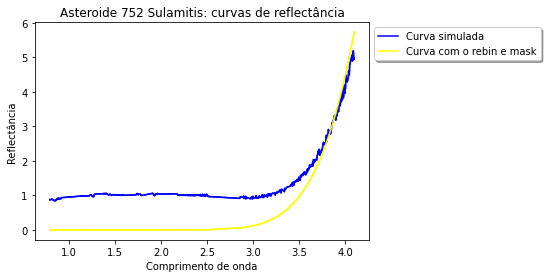

<Figure size 1800x1224 with 0 Axes>

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 752 Sulamitis: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

plt.plot(sulamitisnovo7_clean.w, sulamitisnovo7_clean.r,"blue", lw=1.5,linestyle="solid")
specnovo_clean = func(sulamitisnovo7_clean.w, alpha[0][0], alpha[0][1])
plt.plot(sulamitisnovo7_clean.w, specnovo_clean, "yellow", lw=1.5,linestyle="solid")

plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)

plt.plot(sulamitisnovo7_clean.w, sulamitisnovo7_clean.r,"blue", lw=1.5,linestyle="solid")
plt.plot(sulamitisnovo7_clean.w, specnovo_clean, "yellow", lw=1.5,linestyle="solid")


plt.figure(figsize=(25, 17))